<h1 style='color: black'>Лабораторная работа №2</h1>

<h2 style='color: black'>Выполнила: Хренникова Ангелина, 208 группа</h2>

<h3 style='color: black'>Задание 1 - Б</h3>

1. На выбор:
	вариант A:
		дихотомия и метод Ньютона:
		реализовать в виде функций,
		сделать ползунок для перебора значений вх. параметров (interaction_primer в папке материалов + ролик там же),
		сделать вывод 6 кадров нахождения решения и оформить через массив графиков (6 графиков на одном холсте, расположенные в отдельных ячейках - есть в примере "Графики - операции с графиками")
		сравнить ответ с тем, что даёт solve
		Брать: y = x^3 - 9*x^2 + 23*x - 15
		Примечание: 
			1.обращать внимание на warning'и и прочие ошибки.
			2.Наметки по методу Ньютона есть в "чисметы - Ньютон"
		
	вариант Б:
		метод прямоугольников, метод трапеций.
		аналогично заданию выше.
		y = (ln(x-2) + 1) / (x-2)

In [1]:
y(x) = (ln(x - 2) + 1) / (x - 2)

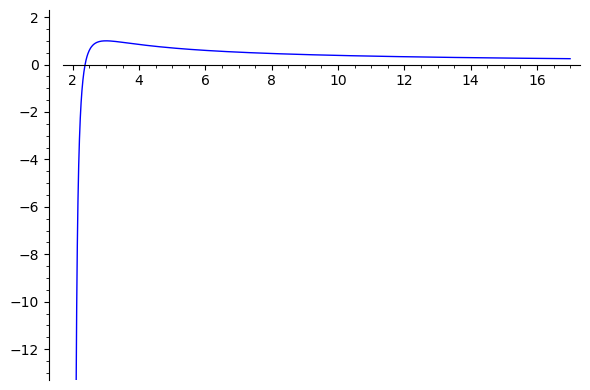

In [2]:
plot(y, (x, 2 - 1e-6, 17), ymin = -13, ymax = 2)

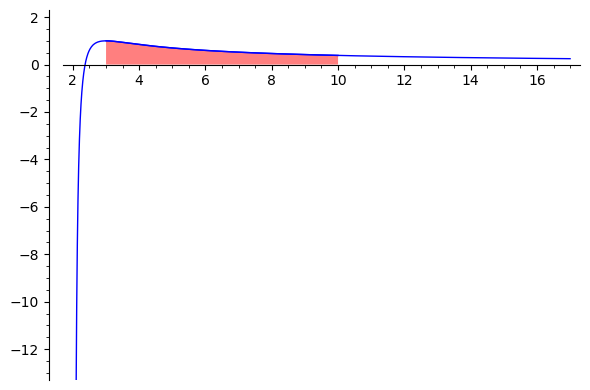

In [3]:
a = 3
b = 10
fill_color = "red"
plot.options["xmin"] = 2-1e-6
plot.options["xmax"] = 17
plot.options["ymin"] = -13
plot.options["ymax"] = 2

p1 = plot(y, (a, b), fill=True, fillcolor=fill_color)
p1 += plot(y)

p1.show()

In [4]:
value, err = numerical_integral(y, a, b)
value

4.2414801043117425

In [5]:
gr1 = []
def interaction_function1(dx):
    import numpy as np
    COLOR_RECT = (1, 0.01, 0.235)
    p1 = plot(y)
    r1 = 0
    rects = []
    for i, x_0 in enumerate(np.arange(a, b, dx)):
        dy = y(x_0)
        curr = dx * dy
        r1 += curr
        txt = text(r"$i={}, curr={}, result={}$".format(i, str(curr)[:6], str(r1)[:6]), (-4.2,0.5), fontsize = 12, color = "black")
        rects.append(
            polygon2d([(x_0, 0),
                   (x_0 + dx, 0),
                   (x_0 + dx, dy),
                   (x_0, dy)], fill = False, rgbcolor = COLOR_RECT)
        )
        p1 += plot(rects[-1])
        gr1.append(p1)
        #(p1 + txt).show(xmin = 2 - 1e-6, xmax = 17, ymin = -13, ymax = 2, aspect_ratio = 1)
    show('Результат для интервала [3; 10]: ')
    show('Встроенная функция = ', value)
    show('Метод прямоугольников = ', r1)
    show('Разность результатов = ', value - r1)
    #print(r1)
    return gr1

Interactive function <function _ at 0x6fff4932f0e0> with 1 widget
  step: FloatSlider(value=0.5, description='…

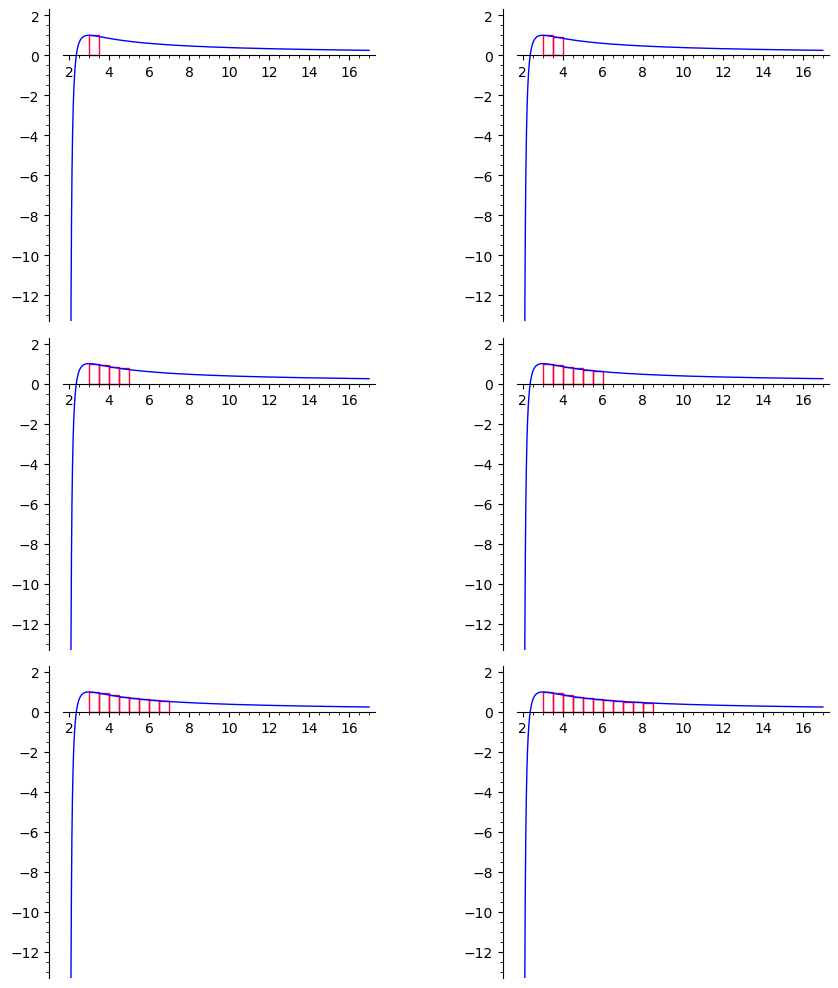

In [6]:
@interact
def _(step=(0.1, 1, 0.1)):
    show(interaction_function1(dx=step))
graphics_array([[gr1[0], gr1[1]], [gr1[3], gr1[5]], [gr1[7], gr1[10]]]).show(figsize=[10,10])

In [7]:
gr2 = []
def interaction_function2(dx):
    import numpy as np
    COLOR_RECT = (1, 0.01, 0.235)
    p1 = plot(y)
    r2 = 0
    trapeze = []
    for i, x_0 in enumerate(np.arange(a, b, dx)):
        dy1 = y(x_0)
        dy2 = y(x_0 + dx)
        curr = dx * ((dy1 + dy2) / 2)
        r2 += curr
        txt = text(r"$i={}, curr={}, result={}$".format(i, str(curr)[:6], str(r2)[:6]), (-4.3,0.5), fontsize = 12, color = "black")
        trapeze.append(
            polygon2d([(x_0, 0),
                       (x_0 + dx, 0),
                       (x_0 + dx, dy2),
                       (x_0, dy1)], fill = False, rgbcolor = COLOR_RECT)
        )
        p1 += plot(trapeze[-1])
        gr2.append(p1)
        #(p1 + txt).show(xmin = 2 - 1e-6, xmax = 17, ymin = -13, ymax = 2, aspect_ratio = 1)
    show('Результат для интервала [3; 10]: ')
    show('Встроенная функция = ', value)
    show('Метод трапеций = ', r2)
    show('Разность результатов = ', value - r2)
    #print(r2)
    return gr2

Interactive function <function _ at 0x6fff4966c680> with 1 widget
  step: FloatSlider(value=0.6000000000000001…

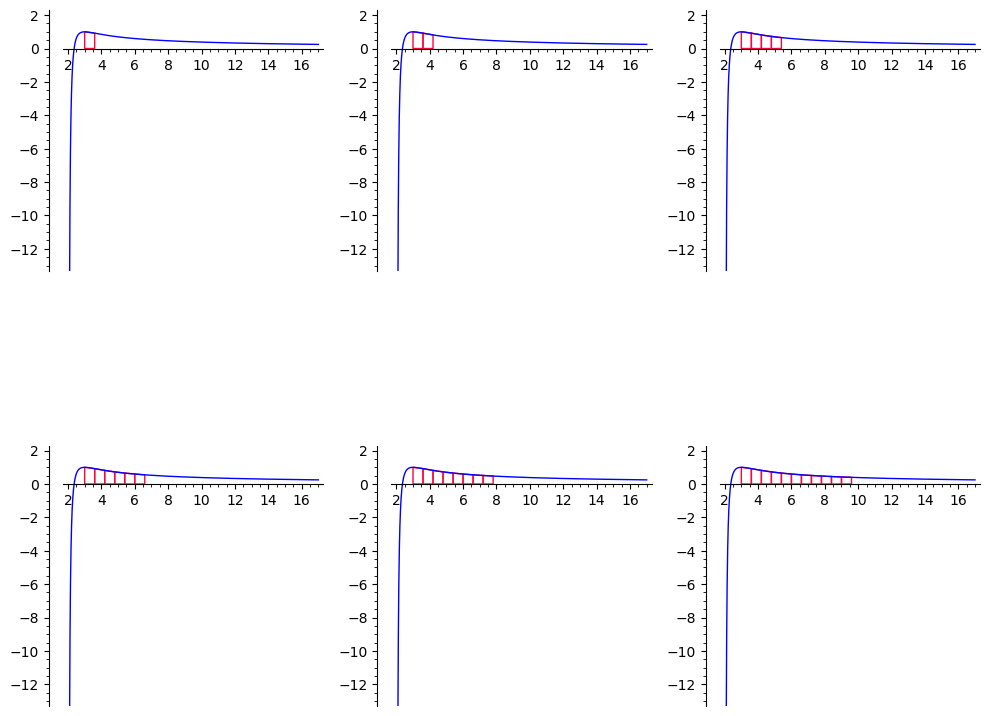

In [8]:
@interact
def _(step=(0.2, 1, 0.1)):
    show(interaction_function2(dx=step))
graphics_array([[gr2[0], gr2[1], gr2[3]], [gr2[5], gr2[7], gr2[10]]]).show(figsize=[10,10])

<h3 style='color: black'>Задание 2</h3>

2.НОД
	посмотреть примеры:
		Полиномы - gcd и прочее
	Задание:
		реализовать расширенный алгоритм Евклида,
		получить НОД, сравнить его с результатом от функции gcd()
		получить представление НОД в виде: f*u + v*g (тождество Безу - см. примеры)

		3.
			f = 126*x^6 - 54*x^5 - 28*x^3 + 12*x^2 + 14*x - 6
			g = -42*x^5 + 39*x^4 - 9*x^3 - 189*x + 81

In [10]:
R.<x> = PolynomialRing(QQ)
show("R =", R)
f = 126*x^6 - 54*x^5 - 28*x^3 + 12*x^2 + 14*x - 6
g = -42*x^5 + 39*x^4 - 9*x^3 - 189*x + 81
res = gcd(f, g)
show('Для f = ', f)
show('и g = ', g)
show("НОД = ", res)

'R =' Univariate Polynomial Ring in x over Rational Field

'Для f = ' 126*x^6 - 54*x^5 - 28*x^3 + 12*x^2 + 14*x - 6

'и g = ' -42*x^5 + 39*x^4 - 9*x^3 - 189*x + 81

'НОД = ' x - 3/7

In [11]:
def bezout(a, b):
    x, xx, y, yy = 1, 0, 0, 1
    while b:
        q = a // b
        k = a % b
        a = b
        b = k
        x, xx = xx, x - xx*q
        y, yy = yy, y - yy*q
    return (x, y, a)

In [12]:
bezout(f, g)

(-2208196/28078299*x^3 + 2206657991486/29199662027163*x^2 - 49663432138/3244406891907*x - 562474997414/29199662027163,
 -2208196/9359433*x^4 + 1058465629660/9733220675721*x^3 + 82261925588/9733220675721*x^2 - 99326864276/87598986081489*x + 88540601892796/87598986081489,
 -5585932569209944/29199662027163*x + 797990367029992/9733220675721)

In [13]:
result = bezout(f, g)
norm = result[2].coefficients()[-1]
show("Coefficient = ", norm)
x = result[0] / norm
y = result[1] /norm
nod = result[2] / norm
show("НОД = ", nod)
show("x = ", x)
show("y = ", y)

'Coefficient = ' -5585932569209944/29199662027163

'НОД = ' x - 3/7

'x = ' 1039937/2529636214*x^3 - 1998607/5059272428*x^2 + 404829/5059272428*x + 509443/5059272428

'y = ' 3119811/2529636214*x^4 - 1438005/2529636214*x^3 - 111759/2529636214*x^2 + 44981/7588908642*x - 40096351/7588908642

In [14]:
x * f + y * g == nod

True